In [39]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
path = 'dataset/'
train = pd.read_csv(path+'train.csv')
vali = pd.read_csv(path+'validation.csv')
combine_pctr = pd.read_csv(path+'model_combine.csv')

In [2]:
ad_ctr = []
ad_name = [1458,3476,3427,3358,2259,2821,3386,2997,2261]
for i in ad_name:
    ad_ctr.append(train['click'][train['advertiser']==i].value_counts(normalize = True)[1])
ad_len = len(ad_name)
ad_ctr

[0.00083473226564105031,
 0.00050464562342478474,
 0.00074884754565216914,
 0.00076448084204447765,
 0.00030658545558598702,
 0.00062225602378400803,
 0.0007180766777520589,
 0.0046066034099877034,
 0.00030675100937663219]

In [3]:
vali_click = vali['click']
sum(vali_click)

226

In [5]:
def const(bid):
    price = bid
    return price

def rand(upper):
    price = int(random.random() * upper)
    return price

def mcpc(ecpc, pctr):
    price = int(ecpc * pctr)
    return price

def lin(pctr, basectr, basebid):
    price = int(pctr/ basectr *basebid)
    return price

def sq(pctr, basectr, basebid):
    price = int(pctr*pctr*4/basectr *basebid)
    return price

import math
def epower(pctr, basectr, basebid):
    a = (pctr-basectr)
    try:
        price = int((math.exp(a)*basebid-1)*0.001)
    except OverflowError:
        price = int(100)
    return price
    
def win( payprice, price):
    result = (price>payprice)
    return result

In [19]:
bid_vali['ratio']= bid_vali.pctr/ad_ctr[ad_name.index(adid)]

In [77]:
final_final_result = []
for i in [64,32,16,8,4,2,1]:#124,158from best constant bid
    final_result = []
    for n in np.linspace(0.95,12.95,13):
        gate_bidwin = []
        bidwin = []
        budget = 6250*1000/i
        cost = 0
        bid_vali = combine_pctr
        for index in range(len(vali)):
            adid = bid_vali.iloc[index][1]
            bidid = vali.bidid[index]
            slotprice = vali.slotprice[index]
            bidprice = vali.bidprice[index]
            payprice = vali.payprice[index]
            click = vali.click[index]
            basectr = ad_ctr[ad_name.index(adid)]
            pclick = bid_vali.iloc[index][0]

            if (pclick/ basectr) >= n*0.95:
                price = const(0)
                if (pclick/ basectr) >= n:
                    price = const(301)
                
            else:
                price=const(0)

            result = win(payprice, price)

            if result and budget-payprice>0:
                detail = []
                budget = budget-payprice
                #index, adid, click, pclick
                detail = [index,bidid,click]
                gate_bidwin.append(detail)
                cost = cost + payprice
            if budget<1:
                break

            slotprice = 0
            bidprice = 0

        c_sum = 0
        for k in range(len(gate_bidwin)):
            c_sum = gate_bidwin[k][2]+c_sum
        if len(gate_bidwin) ==0:
            ctr=0
        else:
            ctr=c_sum/len(gate_bidwin)
            cpm = cost/len(gate_bidwin)* 1000
            cpc = cost/c_sum
        if ctr == 0:
            cpc = 0
        detail2 = [i,n,len(gate_bidwin),c_sum,ctr,cpm,cpc,cost]
        final_result.append(detail2)
        print('budget: 1/',i,'norm: ',n,'num of win: ',len(gate_bidwin),'num of click: ',c_sum,'ctr: ',ctr,'cpm: ',cpm,'cpc: ',cpc,'cost',cost)
    final_final_result.append(final_result)

budget: 1/ 64 norm:  0.95 num of win:  1107 num of click:  5 ctr:  0.00451671183379 cpm:  88216.802168 cpc:  19531.2 cost 97656
budget: 1/ 64 norm:  1.95 num of win:  987 num of click:  11 ctr:  0.0111448834853 cpm:  98942.2492401 cpc:  8877.81818182 cost 97656
budget: 1/ 64 norm:  2.95 num of win:  1106 num of click:  25 ctr:  0.0226039783002 cpm:  88296.5641953 cpc:  3906.24 cost 97656
budget: 1/ 64 norm:  3.95 num of win:  1107 num of click:  30 ctr:  0.0271002710027 cpm:  88216.802168 cpc:  3255.2 cost 97656
budget: 1/ 64 norm:  4.95 num of win:  1071 num of click:  36 ctr:  0.0336134453782 cpm:  91182.0728291 cpc:  2712.66666667 cost 97656
budget: 1/ 64 norm:  5.95 num of win:  1086 num of click:  42 ctr:  0.0386740331492 cpm:  89922.6519337 cpc:  2325.14285714 cost 97656
budget: 1/ 64 norm:  6.95 num of win:  1066 num of click:  48 ctr:  0.0450281425891 cpm:  91609.7560976 cpc:  2034.5 cost 97656
budget: 1/ 64 norm:  7.95 num of win:  1064 num of click:  55 ctr:  0.0516917293233 

budget: 1/ 4 norm:  10.95 num of win:  1498 num of click:  94 ctr:  0.0627503337784 cpm:  93741.6555407 cpc:  1493.88297872 cost 140425
budget: 1/ 4 norm:  11.95 num of win:  1399 num of click:  94 ctr:  0.0671908506076 cpm:  93669.0493209 cpc:  1394.07446809 cost 131043
budget: 1/ 4 norm:  12.95 num of win:  1340 num of click:  94 ctr:  0.0701492537313 cpm:  94161.9402985 cpc:  1342.30851064 cost 126177
budget: 1/ 2 norm:  0.95 num of win:  34129 num of click:  106 ctr:  0.00310586304902 cpm:  91564.3294559 cpc:  29481.1226415 cost 3124999
budget: 1/ 2 norm:  1.95 num of win:  13835 num of click:  119 ctr:  0.00860137332851 cpm:  97800.5782436 cpc:  11370.3445378 cost 1353071
budget: 1/ 2 norm:  2.95 num of win:  7177 num of click:  108 ctr:  0.0150480702243 cpm:  89317.9601505 cpc:  5935.50925926 cost 641035
budget: 1/ 2 norm:  3.95 num of win:  4483 num of click:  101 ctr:  0.0225295561008 cpm:  89193.6203435 cpc:  3958.96039604 cost 399855
budget: 1/ 2 norm:  4.95 num of win:  3288

In [78]:
for i in range(1,7):
    final_final_result[0].extend(final_final_result[i])

In [79]:
new = final_final_result[0]

In [80]:
new=pd.DataFrame(new)
new.columns = ['budget','norm', 'impression','clicks','ctr','cpm','cpc','cost']

In [81]:
int_to_str_budget = {1:'1',2:'1/2',4:'1/4',8:'1/8',16:'1/16',32:'1/32',64:'1/64'}
new['budget'] = new['budget'].map(int_to_str_budget)

In [83]:
new.iloc[np.where(new.clicks == new.clicks.max())[0]]

,budget,norm,impression,clicks,ctr,cpm,cpc,cost
78,1,0.95,51529,158,0.003066,91793.999495,29937.044304,4730053


In [84]:
new.iloc[np.where(new.ctr == new.ctr.max())[0]]

,budget,norm,impression,clicks,ctr,cpm,cpc,cost
25,1/32,12.95,1340,94,0.070149,94161.940299,1342.308511,126177
38,1/16,12.95,1340,94,0.070149,94161.940299,1342.308511,126177
51,1/8,12.95,1340,94,0.070149,94161.940299,1342.308511,126177
64,1/4,12.95,1340,94,0.070149,94161.940299,1342.308511,126177
77,1/2,12.95,1340,94,0.070149,94161.940299,1342.308511,126177
90,1,12.95,1340,94,0.070149,94161.940299,1342.308511,126177


In [86]:
new1 = new[new['budget']=='1']

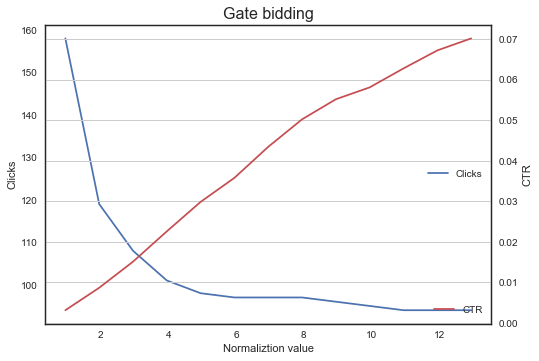

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Normaliztion value')
ax1.plot(new1.norm,new1.clicks,'b',label='Clicks')
ax1.set_ylabel('Clicks')
ax1.set_title("Gate bidding",fontsize=16)
plt.legend(loc='right')
ax2 = ax1.twinx()
ax2.plot(new1.norm, new1.ctr,'r',label='CTR')
ax2.set_ylabel('CTR')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
fig.savefig('gate.eps', dpi=1000)

new.to_csv("gate_bidding_budget.csv", index = False)